In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [6]:
# Load the data
data = pd.read_csv('heart_data.csv')

In [7]:
# Explore the data (EDA)
# Display the first 5 rows of the data
print("First 5 rows of the data:")
print(data.head())

First 5 rows of the data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
# Information about the data and column types
print("\nData information:")
print(data.info())



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB
None


In [9]:
# Descriptive statistics of the data
print("\nDescriptive statistics of the data:")
print(data.describe())


Descriptive statistics of the data:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min      

In [10]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


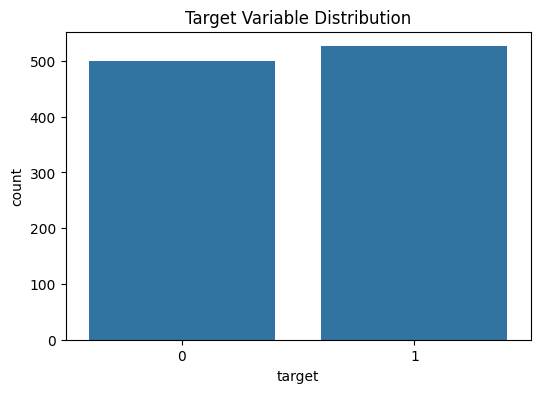

In [57]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Target Variable Distribution')
plt.show()

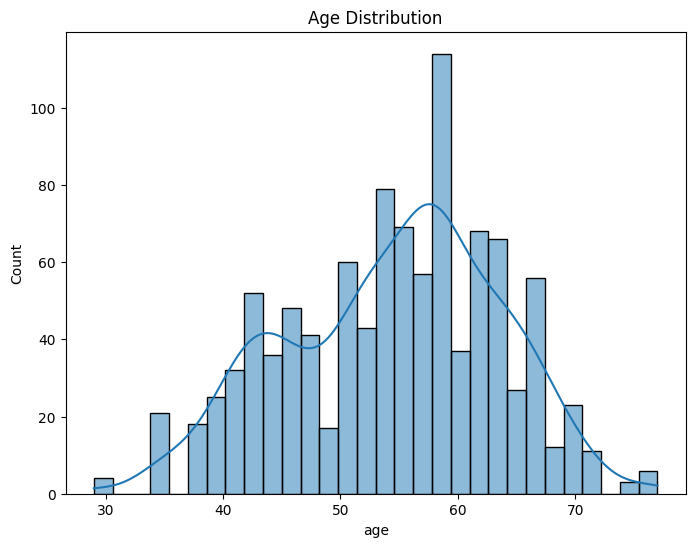

In [62]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


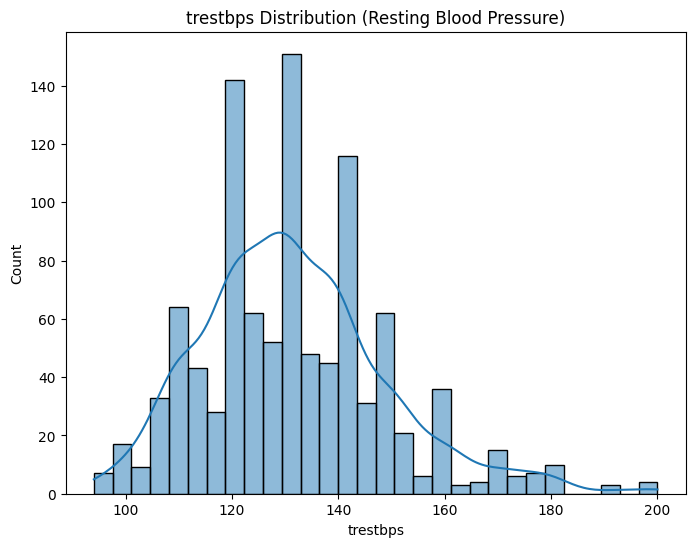

In [58]:
# trestbps Distribution (Resting Blood Pressure)
plt.figure(figsize=(8, 6))
sns.histplot(data['trestbps'], bins=30, kde=True)
plt.title('trestbps Distribution (Resting Blood Pressure)')
plt.show()

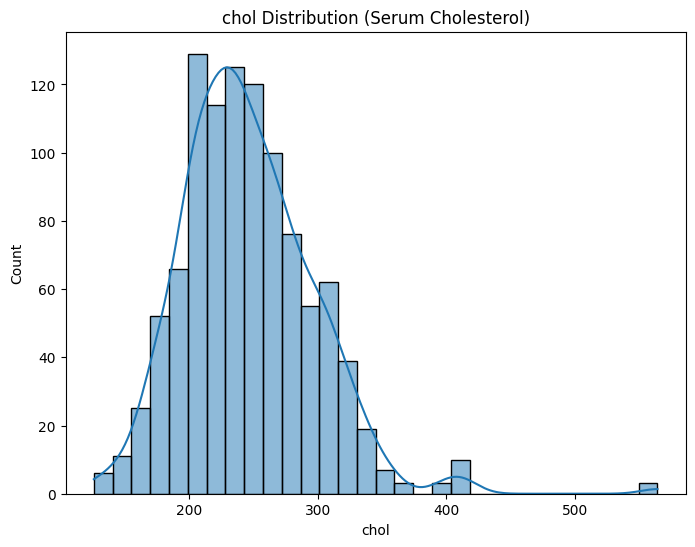

In [59]:
# chol Distribution (Serum Cholesterol)
plt.figure(figsize=(8, 6))
sns.histplot(data['chol'], bins=30, kde=True)
plt.title('chol Distribution (Serum Cholesterol)')
plt.show()

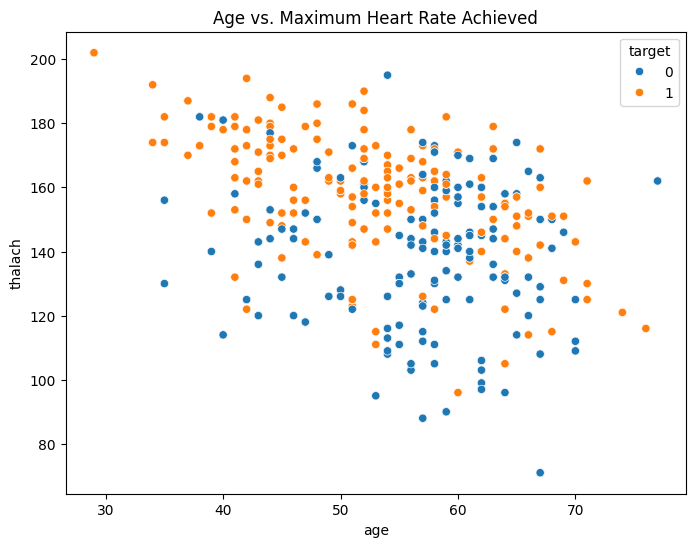

In [60]:
# Age vs. thalach (Maximum Heart Rate Achieved)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data)
plt.title('Age vs. Maximum Heart Rate Achieved')
plt.show()

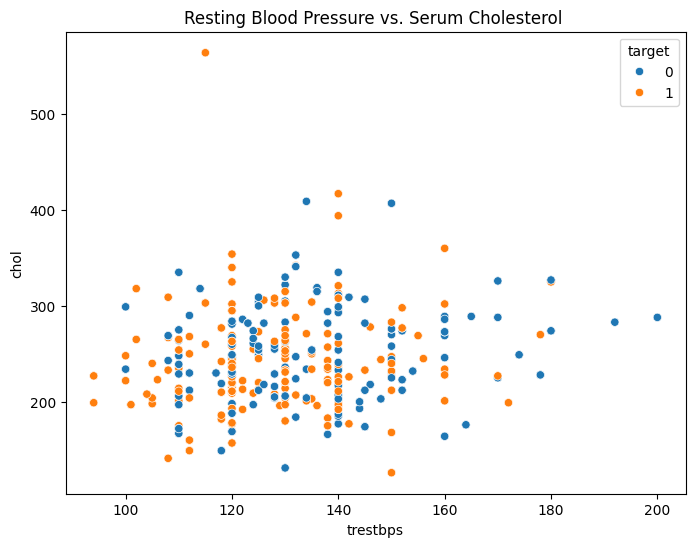

In [61]:
# trestbps vs. chol (Resting Blood Pressure vs. Serum Cholesterol)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trestbps', y='chol', hue='target', data=data)
plt.title('Resting Blood Pressure vs. Serum Cholesterol ')
plt.show()

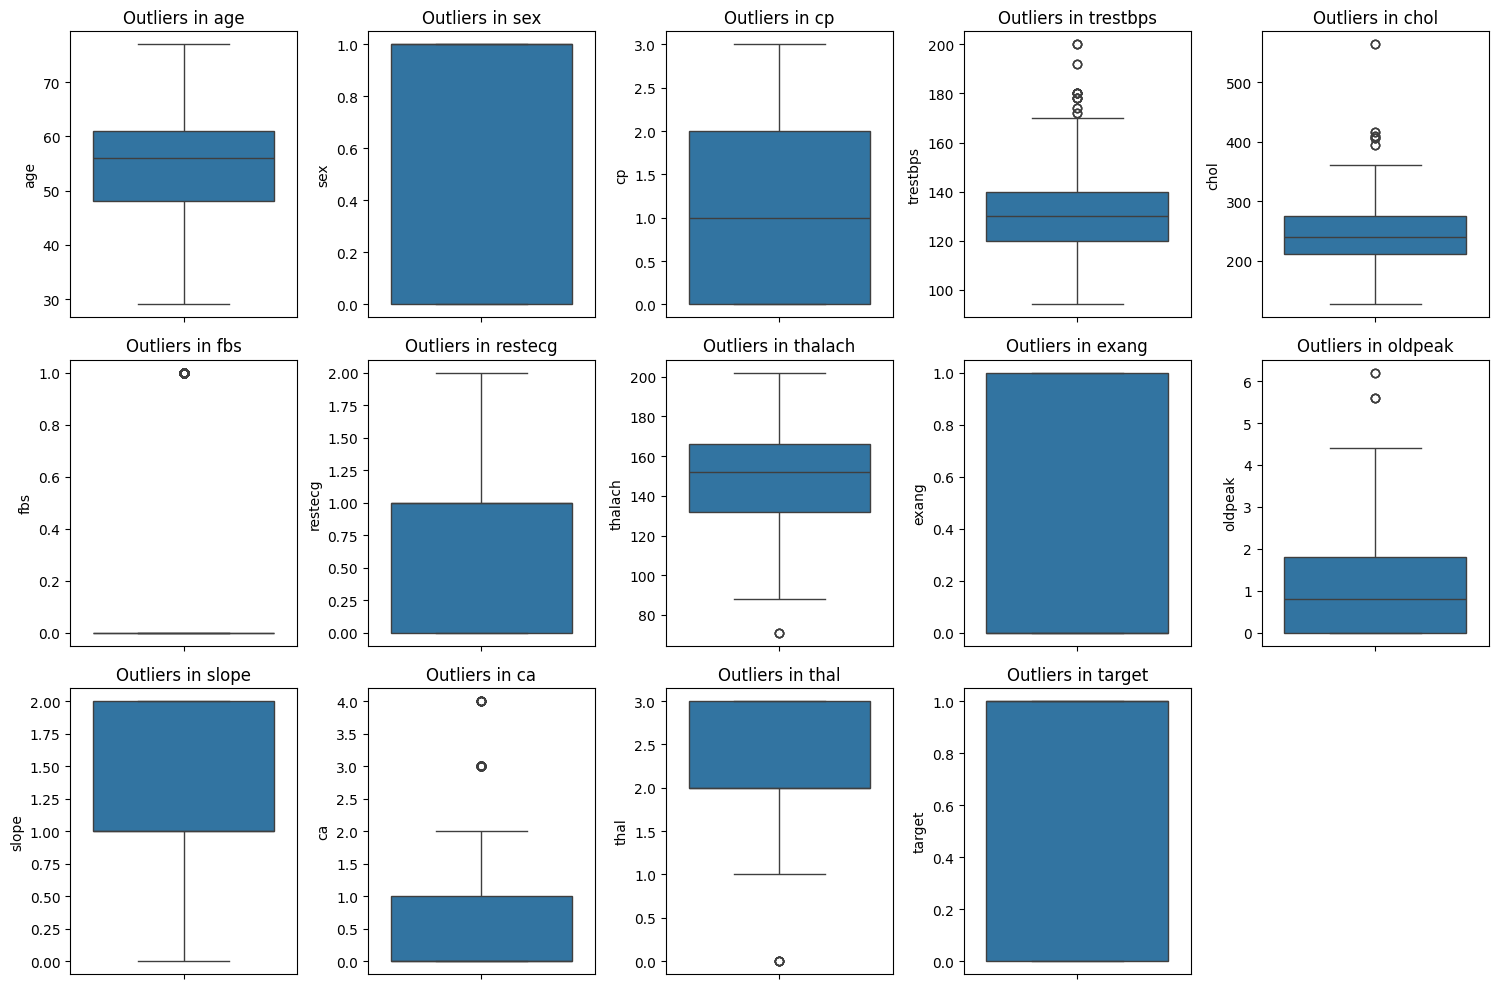

In [55]:
# Outliers
numeric_cols = data.select_dtypes(include=['number']).columns 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

In [64]:
data['restecg'].fillna(data['restecg'].median(), inplace=True)
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\SMART\AppData\Local\Temp\ipykernel_17956\3076589545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['restecg'].fillna(data['restecg'].median(), inplace=True)
C:\Users\SMART\AppData\Local\Temp\ipykernel_17956\3076589545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # type: ignore

scaler = MinMaxScaler() 
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])  

C:\Users\SMART\AppData\Local\Temp\ipykernel_17956\3130532311.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.47916667 0.5        0.85416667 ... 0.375      0.4375     0.52083333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\SMART\AppData\Local\Temp\ipykernel_17956\3130532311.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\SMART\AppData\Local\Temp\ipykernel_17956\3130532311.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.29245283 0.43396226 0.48113208 ... 0.1509434  

In [66]:
if data["thal"].dtype == "object":
    data = pd.get_dummies(data, columns=["thal"], drop_first=True)  # One-Hot Encoding

In [67]:
print("Data after preprocessing:\n", data.head())


Data after preprocessing:
         age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  0.0  0.292453  0.196347    0      0.5  0.740458      0   
1  0.500000    1  0.0  0.433962  0.175799    1      0.0  0.641221      1   
2  0.854167    1  0.0  0.481132  0.109589    0      0.5  0.412214      1   
3  0.666667    1  0.0  0.509434  0.175799    0      0.5  0.687023      0   
4  0.687500    0  0.0  0.415094  0.383562    1      0.5  0.267176      0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000       0  
1  0.500000    0.0  0.00  1.000000       0  
2  0.419355    0.0  0.00  1.000000       0  
3  0.000000    1.0  0.25  1.000000       0  
4  0.306452    0.5  0.75  0.666667       0  
